In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def decrement():
    qdec = QuantumCircuit(5)
    for i in range(5):
        qdec.x(i)
    
    qdec.mct([0,1,2,3],4)
    qdec.mct([0,1,2],3)
    qdec.ccx(0,1,2)
    qdec.cx(0,1)
    qdec.x(0)
    
    for i in range(5):
        qdec.x(i)
    
    qdec = qdec.to_gate()
    qdec.name = "Decrement"
    
    return qdec

def normalize(array):
    rms = np.sqrt(np.sum(np.sum(array**2)))
    ret_array = []
    for i in array:
        ret_array.append( (i * (1/rms)) )
    
    npret_array = np.array(ret_array)
    return npret_array

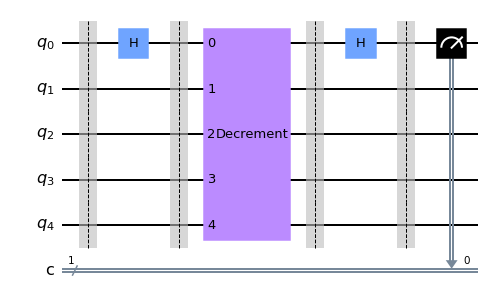

In [11]:
qGaussian = QuantumCircuit(5,1)
qGaussian.barrier()
qGaussian.h(0)
qGaussian.barrier()
qGaussian.append(decrement(), [0,1,2,3,4])
qGaussian.barrier()
qGaussian.h(0)
qGaussian.barrier()
qGaussian.measure(0,0)

qGaussian.draw()

In [19]:
array_test = [1,1]
nparray_test = np.array(array_test)

print(normalize(nparray_test))

print(nparray_test)

nparray_test = normalize(nparray_test)
print(nparray_test)

[0.70710678 0.70710678]
[1 1]
[0.70710678 0.70710678]


[[1.  1.  1.  0.8]
 [0.4 1.  0.8 0.8]
 [0.4 0.4 0.6 0.8]
 [0.4 0.6 0.6 0.6]]


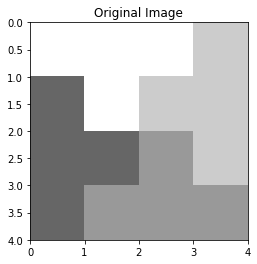

In [3]:
image = np.array([[1.0, 1.0, 1.0, 0.8],
             [0.4, 1.0, 0.8, 0.8],
             [0.4, 0.4, 0.6, 0.8],
             [0.4, 0.6, 0.6, 0.6]])

def plot_image(img, title: str):
    plt.title(title)
    #plt.xticks(range(img.shape[0]))
    #plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, 4, 4, 0], vmin=0, vmax=1, cmap='gray')
    plt.show()
    
print(image)
    
plot_image(image, 'Original Image')

In [43]:
# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)


image_state = amplitude_encode(image)

In [24]:
decUnitary = np.roll(np.identity(2**5), 1, axis=1)
print(decUnitary)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


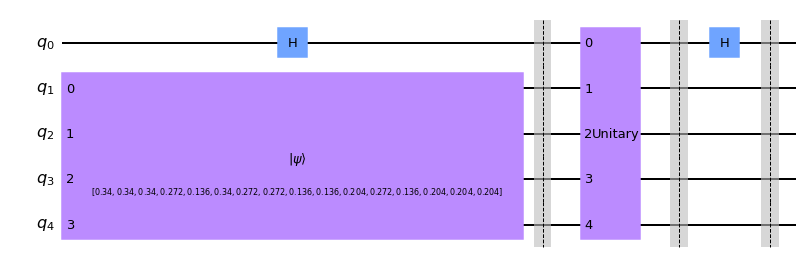

In [8]:
qc = QuantumCircuit(5)

qc.initialize(image_state, [1,2,3,4])

qc.h(0)

qc.barrier()

qc.unitary(decUnitary, [0,1,2,3,4])

qc.barrier()

qc.h(0)

qc.save_statevector()


qc.draw()

In [9]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
cdec = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
print(statevector)

Statevector([ 3.40206909e-01-2.08316651e-17j,
             -5.53364191e-17+2.08316651e-17j,
              3.40206909e-01-2.08316651e-17j,
             -5.53364191e-17+2.08316651e-17j,
              3.06186218e-01-1.66653321e-17j,
              3.40206909e-02+1.66653321e-17j,
              2.04124145e-01-8.33266604e-18j,
              6.80413817e-02+8.33266604e-18j,
              2.38144836e-01-2.08316651e-17j,
             -1.02062073e-01+2.08316651e-17j,
              3.06186218e-01-1.66653321e-17j,
              3.40206909e-02+1.66653321e-17j,
              2.72165527e-01-1.66653321e-17j,
             -4.19697881e-17+1.66653321e-17j,
              2.04124145e-01-8.33266604e-18j,
              6.80413817e-02+8.33266604e-18j,
              1.36082763e-01-8.33266604e-18j,
             -2.09848941e-17+8.33266604e-18j,
              1.70103454e-01-1.24989991e-17j,
             -3.40206909e-02+1.24989991e-17j,
              2.38144836e-01-1.66653321e-17j,
             -3.40206909e-02+1.666

In [10]:
iteration1 = []
for i in range(2**5):
    if(i % 2 == 0):
        iteration1.append(np.real(statevector[i]))
        
print(iteration1)

[0.34020690871988585, 0.34020690871988585, 0.30618621784789724, 0.2041241452319315, 0.2381448361039201, 0.30618621784789724, 0.2721655269759087, 0.2041241452319315, 0.13608276348795434, 0.1701034543599429, 0.23814483610392007, 0.2041241452319315, 0.1701034543599429, 0.20412414523193148, 0.20412414523193148, 0.2721655269759087]


In [11]:
npiteration1 = np.array(iteration1)
npiteration1 = npiteration1.reshape(4,4)
print(npiteration1)

[[0.34020691 0.34020691 0.30618622 0.20412415]
 [0.23814484 0.30618622 0.27216553 0.20412415]
 [0.13608276 0.17010345 0.23814484 0.20412415]
 [0.17010345 0.20412415 0.20412415 0.27216553]]


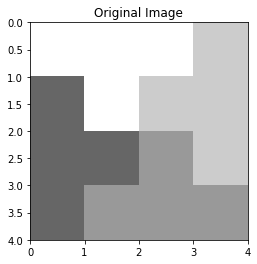

In [58]:
plot_image(image, "Original Image")

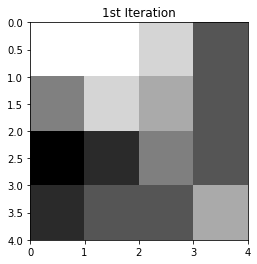

In [13]:
plot_image(npiteration1, "1st Iteration")

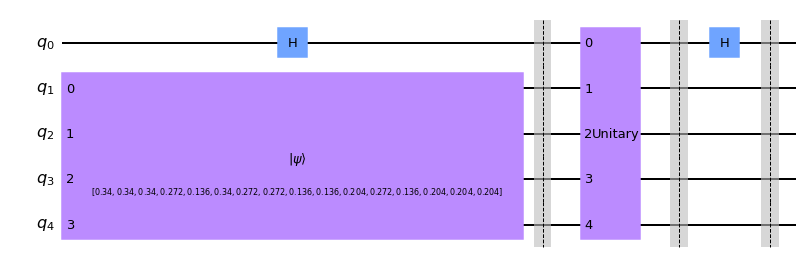

In [44]:
#First Iteration:
image = np.array([[1.0, 1.0, 1.0, 0.8],
             [0.4, 1.0, 0.8, 0.8],
             [0.4, 0.4, 0.6, 0.8],
             [0.4, 0.6, 0.6, 0.6]])

image_state = amplitude_encode(image)

qc = QuantumCircuit(5)
qc.initialize(image_state, [1,2,3,4])
qc.h(0)
qc.barrier()
qc.unitary(decUnitary, [0,1,2,3,4])
qc.barrier()
qc.h(0)
qc.save_statevector()

qc.draw()


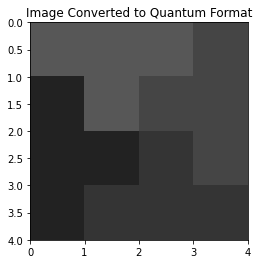

In [61]:
npimage_state = np.array(image_state)
npimage_state = npimage_state.reshape(4,4)
plot_image(npimage_state, "Image Converted to Quantum Format")

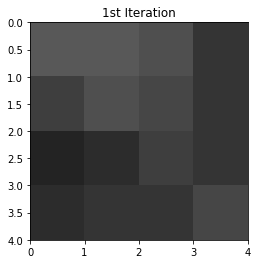

In [45]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector1 = result.get_statevector(qc)

iteration1 = []
for i in range(2**5):
    if(i % 2 == 0):
        iteration1.append(np.real(statevector1[i]))
        
npiteration1 = np.array(iteration1)
npiteration1 = normalize(npiteration1)
npiteration1 = npiteration1.reshape(4,4)

plot_image(npiteration1, "1st Iteration")

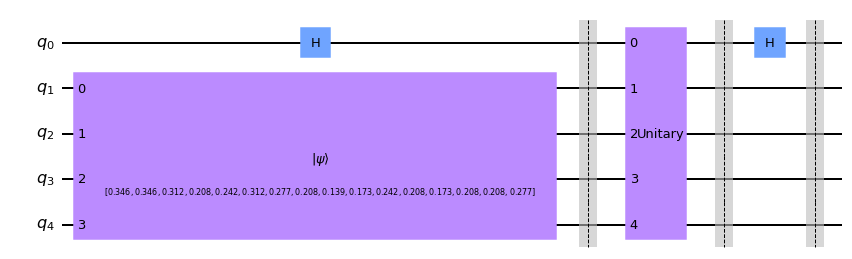

In [46]:
#Second Iteration:
iteration1_state = amplitude_encode(npiteration1)

qc = QuantumCircuit(5)
qc.initialize(iteration1_state, [1,2,3,4])
qc.h(0)
qc.barrier()
qc.unitary(decUnitary, [0,1,2,3,4])
qc.barrier()
qc.h(0)
qc.save_statevector()

qc.draw()

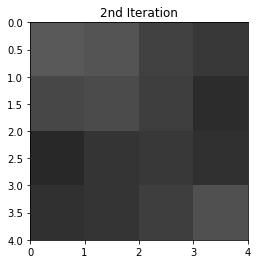

In [47]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector2 = result.get_statevector(qc)

iteration2 = []
for i in range(2**5):
    if(i % 2 == 0):
        iteration2.append(np.real(statevector2[i]))
        
npiteration2 = np.array(iteration2)
npiteration2 = normalize(npiteration2)
npiteration2 = npiteration2.reshape(4,4)

plot_image(npiteration2, "2nd Iteration")

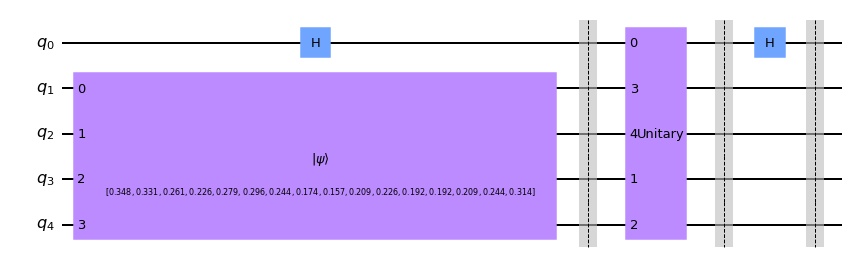

In [48]:
#3rd Iteration:
iteration2_state = amplitude_encode(npiteration2)

qc = QuantumCircuit(5)
qc.initialize(iteration2_state, [1,2,3,4])
qc.h(0)
qc.barrier()
qc.unitary(decUnitary, [0,3,4,1,2])
qc.barrier()
qc.h(0)
qc.save_statevector()

qc.draw()

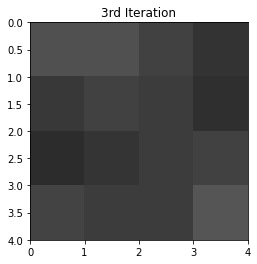

In [49]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector3 = result.get_statevector(qc)

iteration3 = []
for i in range(2**5):
    if(i % 2 == 0):
        iteration3.append(np.real(statevector3[i]))
        
npiteration3 = np.array(iteration3)
npiteration3 = normalize(npiteration3)
npiteration3 = npiteration3.reshape(4,4)

plot_image(npiteration3, "3rd Iteration")

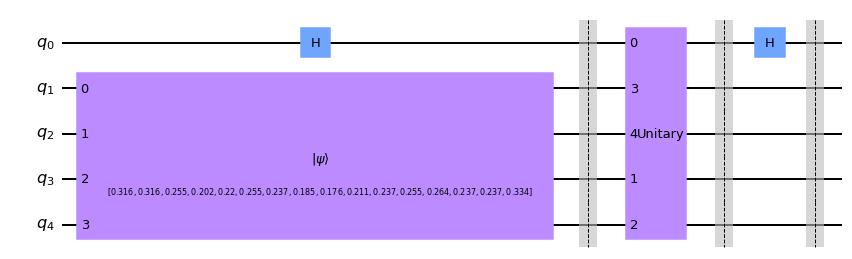

In [50]:
#4th Iteration:
iteration3_state = amplitude_encode(npiteration3)

qc = QuantumCircuit(5)
qc.initialize(iteration3_state, [1,2,3,4])
qc.h(0)
qc.barrier()
qc.unitary(decUnitary, [0,3,4,1,2])
qc.barrier()
qc.h(0)
qc.save_statevector()

qc.draw()

[[0.26947396 0.28714438 0.24738593 0.19437466]
 [0.19879226 0.23413311 0.23855072 0.22088029]
 [0.22088029 0.2252979  0.23855072 0.29597959]
 [0.29156199 0.24738593 0.22088029 0.32690283]]


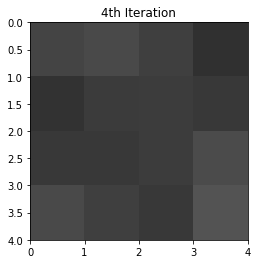

In [51]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector4 = result.get_statevector(qc)

iteration4 = []
for i in range(2**5):
    if(i % 2 == 0):
        iteration4.append(np.real(statevector4[i]))
        
npiteration4 = np.array(iteration4)
npiteration4 = normalize(npiteration4)
npiteration4 = npiteration4.reshape(4,4)

print(npiteration4)

plot_image(npiteration4, "4th Iteration")

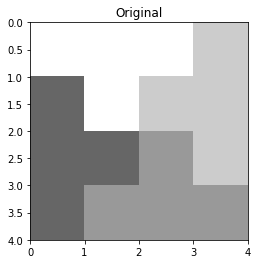

In [52]:
plot_image(image, "Original")

In [6]:
image = np.array([[1.0, 1.0, 1.0, 0.8],
             [0.4, 1.0, 0.8, 0.8],
             [0.4, 0.4, 0.6, 0.8],
             [0.4, 0.6, 0.6, 0.6]])

top_left = (1.0 + (2 * 1.0) + 1.0 + (2 * 0.4) + (4 * 1.0) + (2 * 0.8) + 0.4 + (2 * 0.4) + 0.6) / 16.0
top_right = (1.0 + (2 * 1.0) + 0.8 + (2 * 1.0) + (4 * 0.8) + (2 * 0.8) + 0.4 + (2 * 0.6) + 0.8) / 16.0
bottom_right = (1.0 + (2 * 0.8) + 0.8 + (2 * 0.4) + (4 * 0.6) + (2 * 0.8) + 0.6 + (2 * 0.6) + 0.6) / 16.0
bottom_left = (0.4 + (2 * 1.0) + 0.8 + (2 * 0.4) + (4 * 0.4) + (2 * 0.6) + 0.4 + (2 * 0.6) + 0.6) / 16.0

image_ideal = np.array([[1.0, 1.0, 1.0, 0.8],
             [0.4, top_left, top_right, 0.8],
             [0.4, bottom_left, bottom_right, 0.8],
             [0.4, 0.6, 0.6, 0.6]])

print(image_ideal)

[[1.     1.     1.     0.8   ]
 [0.4    0.7625 0.8125 0.8   ]
 [0.4    0.5625 0.6625 0.8   ]
 [0.4    0.6    0.6    0.6   ]]


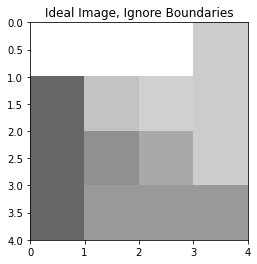

In [57]:
plot_image(image_ideal, "Ideal Image, Ignore Boundaries")

In [10]:
qtop_left = 0.26947396
qtop_right = 0.28714438
qbottom_left = 0.19879226
qbottom_right = 0.23413311

qarr = [(qtop_right / qtop_left), (qtop_right / qtop_right), (qtop_right / qbottom_left), (qtop_right / qbottom_right)]
arr = [(top_right / top_left), (top_right / top_right), (top_right / bottom_left), (top_right / bottom_right)]

print(qarr)
print(arr)

#They're COMPLETELY EQUAL!

[1.0655737571081079, 1.0, 1.4444444668016752, 1.2264150935337594]
[1.0655737704918031, 1.0, 1.4444444444444444, 1.2264150943396228]


In [11]:
#Say we run one iteration of kernel on a pixel that we actually want to calculate. We hence find th eactual pixel value.

norm = (top_right) / qtop_right

qtop_left_norm = qtop_left * norm
qtop_right_norm = qtop_right * norm
qbottom_left_norm = qbottom_left * norm
qbottom_right_norm = qbottom_right * norm

arr_norm = [qtop_left_norm, qtop_right_norm, qbottom_left_norm, qbottom_right_norm]

print(arr_norm)

[0.7625000095770638, 0.8125, 0.5624999912935785, 0.6625000004353211]


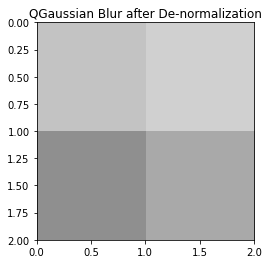

In [14]:
nparr_norm = np.array(arr_norm)
plot_image2(nparr_norm.reshape(2,2), "QGaussian Blur after De-normalization")

In [4]:
def plot_image2(img, title: str):
    plt.title(title)
    #plt.xticks(range(img.shape[0]))
    #plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, 2, 2, 0], vmin=0, vmax=1, cmap='gray')
    plt.show()
    
    

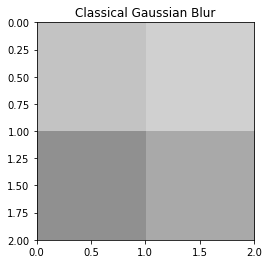

In [7]:
cGBlur = [top_left, top_right, bottom_left, bottom_right]
npcGBlur = np.array(cGBlur)

plot_image2(npcGBlur.reshape(2,2), "Classical Gaussian Blur")